# Using a Adaline GD model vs Adaline SGD model to classify seeds by type.

Machine Learning Fall 2022 
Mia (Bomi) Jung

In [1]:
import numpy as np

### Implementing an adaptive linear neuron (AdalineGD) in Python

In [3]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

### Large scale machine learning and (Adaline with) stochastic gradient descent

In [ ]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

### Reading-in the Seed data

In [4]:
import os
import pandas as pd

try:
    df = pd.read_csv('seeds_dataset.csv') # https://data.world/databeats/seeds
    
except HTTPError:
    s = 'seeds_dataset.csv'
    print('From local path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()


,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
205,206,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,207,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,208,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,210,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


### Plotting the Seed data

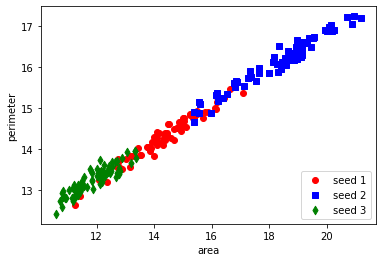

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# extract seed 1's area and perimeter.
seed1area = df.iloc[0:70, [1]].values
seed1peri = df.iloc[0:70, [2]].values
# print(seed1area)
# print(seed2peri)

# extract seed 2's area and perimeter.
seed2area = df.iloc[70:140, [1]].values
seed2peri = df.iloc[70:140, [2]].values
# print(seed2area)
# print(seed2peri)
    
# extract seed 3's area and perimeter.
seed3area = df.iloc[140:210, [1]].values
seed3peri = df.iloc[140:210, [2]].values
# print(seed23area)
# print(seed3peri)

# plot data scatter for seed 1
plt.scatter(seed1area, seed1peri,
            color='red', marker='o', label='seed 1')

# plot data scatter for seed 2
plt.scatter(seed2area, seed2peri,
            color='blue', marker='s', label='seed 2')

# plot data scatter for seed 3
plt.scatter(seed3area, seed3peri,
            color='green', marker='d', label='seed 3')

plt.xlabel('area')
plt.ylabel('perimeter')
plt.legend(loc='lower right')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### NOTE: I chose to train the models to classify seed types 2 and 3. ###

# Extract area and perimeter for seed 2 and 3:
x1 = df.iloc[70:210, [1, 2]].values
y1 = df.iloc[70:210, 8].values

# Make 0 represent seed2, and 1 represent seed 3.
y1 = np.where(y1 == 2, 0, 1) 
print(y1)

### A function for plotting decision regions

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [61]:
# standardize features
X_std = np.copy(x1)
X_std[:, 0] = (x1[:, 0] - x1[:, 0].mean()) / x1[:, 0].std()
X_std[:, 1] = (x1[:, 1] - x1[:, 1].mean()) / x1[:, 1].std()

## Improving gradient descent through feature scaling

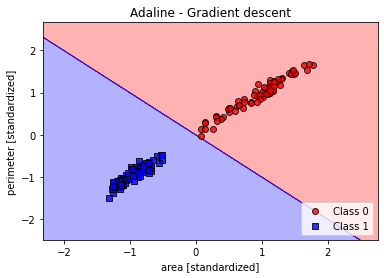

[0.5052372005921955, 0.12561745492471404, 0.05908137834355783, 0.03798132131654044, 0.0305010728930016, 0.02781259073065664, 0.026844614392861916, 0.026495836871914872, 0.0263699644963006, 0.026324338736250764]


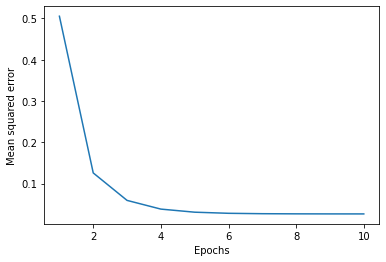

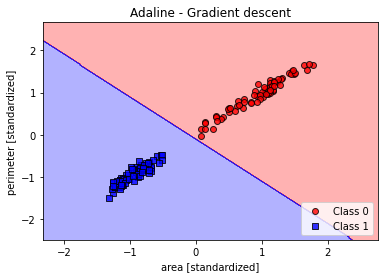

[0.5052372005921955, 0.47742633550147856, 0.4514087809590143, 0.42705938252981296, 0.40426217753386934, 0.3829096996736429, 0.3629023371240208, 0.3441477399393312, 0.32656027295481277, 0.31006051065759965, 0.29457477077669375, 0.2800346835943994, 0.2663767942149553, 0.253542195241155, 0.24147618750803282, 0.23012796670550592, 0.219450333890418, 0.20939942804384376, 0.19993447897280625, 0.19101757898767907, 0.18261347190837046, 0.17468935806471161, 0.16721471406004734, 0.16016112616252945, 0.15350213627667894, 0.14721309952898676, 0.14127105257620456, 0.13565459181402728, 0.13034376072754647, 0.12531994568357094, 0.12056577951906554, 0.11606505232989449, 0.11180262891011218, 0.10776437233451719, 0.10393707321635716, 0.10030838420820049, 0.09686675934731102, 0.0936013978775948, 0.09050219220853503, 0.08755967969767675, 0.08476499796734026, 0.08210984348849006, 0.07958643318520423, 0.07718746883212439, 0.07490610403472606, 0.07273591359836289, 0.07067086510690102, 0.06870529254547385, 0.0

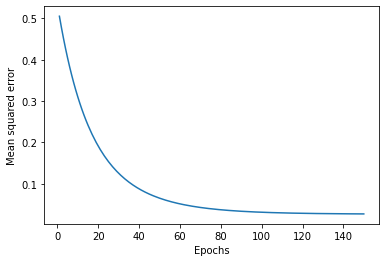

In [88]:
ada_gd = AdalineGD(n_iter=10, eta=0.2, random_state = 4)
ada_gd.fit(X_std, y1)

plot_decision_regions(X_std, y1, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('area [standardized]')
plt.ylabel('perimeter [standardized]')
plt.legend(loc='lower right')
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

print(ada_gd.losses_)
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_)
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

####################################################################

ada_gd = AdalineGD(n_iter=150, eta=0.01, random_state = 4)
ada_gd.fit(X_std, y1)

plot_decision_regions(X_std, y1, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('area [standardized]')
plt.ylabel('perimeter [standardized]')
plt.legend(loc='lower right')
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

print(ada_gd.losses_)
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_)
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

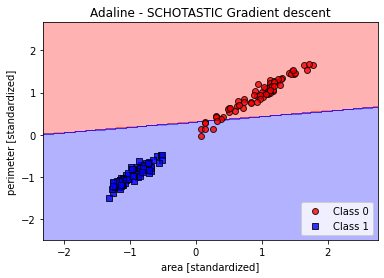

[0.07374096733000954, 0.07458926377066029, 0.08553709749647344, 0.06415465981688409, 0.05832671685070103, 0.06238900718496439, 0.06973967939312699, 0.058419311515163865, 0.07826346358038079, 0.07600631590639761, 0.08059744433339656, 0.0783244819232275, 0.05484506562362463, 0.060906443491782536, 0.05746204412137664, 0.07177981900691854, 0.0779479226394074, 0.05615019388785435, 0.07432779884468176, 0.06461087542304535, 0.07844038265070252, 0.06291083165169215, 0.07032585312318085, 0.06280624345209812, 0.08101689780929082, 0.06022411279302199, 0.05577357849200819, 0.06971465111990693, 0.06632353118721403, 0.05375073584152562, 0.06036966017606587, 0.07528174032685109, 0.07897810616336337, 0.06114458280284497, 0.0654756214795563, 0.05968633815261177, 0.05871823504081277, 0.07193649384025126, 0.07752881840961308, 0.06908007232423065, 0.06823839954136954, 0.07105194943993347, 0.073129582865054, 0.0681226530317881, 0.06258433940348905, 0.08366089418347314, 0.05396813706766846, 0.05150360031103

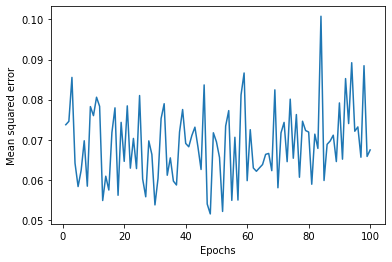

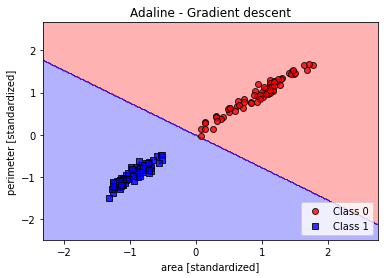

[0.0954876869722265, 0.02732617093947854, 0.027348551666500555, 0.027255348567334803, 0.0270066583195885, 0.02707114426044942, 0.027069089272762446, 0.027347743786126685, 0.0270214753719196, 0.027310967741284126, 0.02725798880842998, 0.027095381218000845, 0.02719710200075307, 0.027106915633311978, 0.027215552570318696]


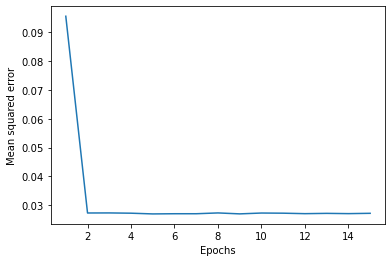

In [90]:
ada_sgd = AdalineSGD(n_iter=100, eta=0.2, random_state=24)
ada_sgd.fit(X_std, y1)

plot_decision_regions(X_std, y1, classifier=ada_sgd)
plt.title('Adaline - SCHOTASTIC Gradient descent')
plt.xlabel('area [standardized]')
plt.ylabel('perimeter [standardized]')
plt.legend(loc='lower right')
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

print(ada_sgd.losses_)
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_)
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

####################################################################

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=24)
ada_sgd.fit(X_std, y1)

plot_decision_regions(X_std, y1, classifier=ada_sgd)
plt.title('Adaline - Gradient descent')
plt.xlabel('area [standardized]')
plt.ylabel('perimeter [standardized]')
plt.legend(loc='lower right')
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

print(ada_sgd.losses_)
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_)
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# Conclusion

In this Notebook, I compared the Adaline model to the Adaline with stochastic gradient descent model in their ability to classify two different types of seeds by separating them linearly.

The final classification accuracy was better with the regular AdalineGD model when the learning rate was bigger (eta = 0.2). With this learning rate, the AdalineGD model took less than 10 iterations for the mean squared error to converge to about 0.026, while the Adaline with SGD model's mean squared error consistantly fluctuated between 0.1 and 0.05 no matter how high the number of iterations I tried inputting.

However, when the learning rate was smaller (eta = 0.01), the Adaline with SGD model had better final classification accuracy. It only took a few iterations for the for the mean squred error to converge down to around 0.027 using the Adaline with SGD model. With the regular Adaline GD model, it took many more iterations for the mean squared error to reach down to a smilar level.